In [11]:
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Levenshtein import distance

In [12]:
truth_path = "./Annotations/val.json"
predict_path = "default_pred.json"
with open(truth_path) as f:
    truth = json.load(f)
    
with open(predict_path) as f:
    predict = json.load(f)

print(len(truth))
assert(len(truth) == len(predict))

4319


In [18]:
# load image quality
quality_path = "./quality_annotations/val.json"
with open(quality_path) as f:
    quality = json.load(f)

quality_dict = dict()
for q in quality:
    quality_dict[q['image']] = q['flaws']

In [59]:
def is_number(s):
    if s.isnumeric() or s.isdigit():
        return True
    try:
        float(s)
        return True
    except ValueError:
        return False

In [75]:
def flaw_acc(flaw_type, human_count):
    acc = 0
    count = 0
    answerable_acc = 0
    answerable_count = 0
    total_acc = 0
    total_count = 0
    dist = 0
    answerable_dist = 0
    
    binary_acc = 0
    binary_count = 0
    binary_dist = 0
    
    num_acc = 0
    num_count = 0
    num_dist = 0
    for i in range(len(truth)):
        # image id should be same
        assert(truth[i]["image"] == predict[i]["image"])
        predict_label = predict[i]["answer"]
        num_human = 0.0
        cur_dist = 0
        
        # calculate acc for each question
        for a in truth[i]["answers"]:
            cur_dist += distance(predict_label, a["answer"])
            if a["answer"] == predict_label:
                num_human += 1.0
        cur_acc = min(num_human/3, 1)
        
        # calculate correct answers (>=3 human label)
        answer_dict = {}
        for a in truth[i]["answers"]:
            if a["answer"] in answer_dict:
                answer_dict[a["answer"]] += 1
            else:
                answer_dict[a["answer"]] = 1
        
        correct_answers = []
        for label,score in answer_dict.items():
            if score >= 3:
                correct_answers.append(label)
        
        is_num = False
        for c in correct_answers:
            if is_number(c):
                is_num = True

        # calculate flaw acc
        flaw = quality_dict[predict[i]["image"]]
        if flaw[flaw_type] >= human_count:
            dist += (cur_dist/10)
            count += 1
            acc += cur_acc
            if "unanswerable" in correct_answers:
                answerable_count += 1
                answerable_acc += cur_acc
                answerable_dist += (cur_dist/10)
            if "yes" in correct_answers or "no" in correct_answers:
                binary_count += 1
                binary_acc += cur_acc
                binary_dist += (cur_dist/10)
            
            if is_num:
                num_count += 1
                num_acc += cur_acc
                num_dist += (cur_dist/10)  
    
    print(flaw_type + " percent", count/len(truth))
    
    print(flaw_type + " binary acc", binary_acc/binary_count)
    print(flaw_type + " num acc", num_acc/num_count)
    print(flaw_type + " unanswerable acc", answerable_acc/answerable_count)
    print(flaw_type + " acc", acc/count)
    
    print(flaw_type + " binary dist", binary_dist/binary_count)
    print(flaw_type + " num dist", num_dist/num_count)
    print(flaw_type + " unanswerable dist", answerable_dist/answerable_count)
    print(flaw_type + " dist", dist/count)
    

In [70]:
acc = 0
count = 0
answerable_acc = 0
answerable_count = 0
total_acc = 0
total_count = 0
dist = 0
answerable_dist = 0

binary_acc = 0
binary_count = 0
binary_dist = 0

num_acc = 0
num_count = 0
num_dist = 0
for i in range(len(truth)):
    # image id should be same
    assert(truth[i]["image"] == predict[i]["image"])
    predict_label = predict[i]["answer"]
    num_human = 0.0
    cur_dist = 0

    # calculate acc for each question
    for a in truth[i]["answers"]:
        cur_dist += distance(predict_label, a["answer"])
        if a["answer"] == predict_label:
            num_human += 1.0
    cur_acc = min(num_human/3, 1)

    # calculate correct answers (>=3 human label)
    answer_dict = {}
    for a in truth[i]["answers"]:
        if a["answer"] in answer_dict:
            answer_dict[a["answer"]] += 1
        else:
            answer_dict[a["answer"]] = 1

    correct_answers = []
    for label,score in answer_dict.items():
        if score >= 3:
            correct_answers.append(label)

    is_num = False
    for c in correct_answers:
        if is_number(c):
            is_num = True

    dist += (cur_dist/10)
    count += 1
    acc += cur_acc
    if "unanswerable" in correct_answers:
        answerable_count += 1
        answerable_acc += cur_acc
        answerable_dist += (cur_dist/10)
    if "yes" in correct_answers or "no" in correct_answers:
        binary_count += 1
        binary_acc += cur_acc
        binary_dist += (cur_dist/10)

    if is_num:
        num_count += 1
        num_acc += cur_acc
        num_dist += (cur_dist/10)  

print("percent", count/len(truth))

print("binary acc", binary_acc/binary_count)
print("num acc", num_acc/num_count)
print("unanswerable acc", answerable_acc/answerable_count)
print("acc", acc/count)

print("binary dist", binary_dist/binary_count)
print("num dist", num_dist/num_count)
print("unanswerable dist", answerable_dist/answerable_count)
print("dist", dist/count)

 percent 1.0
 binary acc 0.6642335766423361
 num acc 0.3004694835680751
 unanswerable acc 0.8301659125188539
 acc 0.4896966890483908
 binary dist 6.667883211678835
 num dist 8.071830985915492
 unanswerable dist 6.126787330316738
 dist 8.729636489928225


In [71]:
total_acc = 0
answerable_acc = 0
answerable_count = 0

dist = 0
answerable_dist = 0

for i in range(len(truth)):
    # image id should be same
    assert(truth[i]["image"] == predict[i]["image"])
    answers = []
    predict_label = predict[i]["answer"]
    num_human = 0.0
    cur_dist = 0
    for a in truth[i]["answers"]:
        cur_dist += distance(predict_label, a["answer"])
        if a["answer"] == predict_label:
            num_human += 1.0
    dist += cur_dist/10
    acc = min(num_human/3, 1)
    if truth[i]['answer_type'] != "unanswerable":
        answerable_count += 1
        answerable_acc += acc
        answerable_dist += cur_dist/10
    
    total_acc += acc

print("total acc", total_acc/len(truth))
print("total answerable acc", answerable_acc/answerable_count)
print("avg edit distance", dist/(len(truth)))
print("anserable edit distance", answerable_dist/answerable_count)

total acc 0.4896966890483908
total answerable acc 0.37286980231765493
avg edit distance 8.729636489928225
anserable edit distance 10.109475119291075


In [76]:
# flaw acc
ALL_FLAW_TYPE = ["BLR", "FRM", "DRK", "BRT", "OBS", "OTH", "NON", "ROT"]

for f in ALL_FLAW_TYPE:
    print("")
    flaw_acc(f, 1)


BLR percent 0.6223662884927067
BLR binary acc 0.6851851851851851
BLR num acc 0.3095238095238095
BLR unanswerable acc 0.8220720720720721
BLR acc 0.5146329365079356
binary percent 0.06696428571428571
num percent 0.010416666666666666
unanswerable percent 0.27529761904761907

FRM percent 0.7927761055799953
FRM binary acc 0.6741741741741744
FRM num acc 0.327683615819209
FRM unanswerable acc 0.8248528902734512
FRM acc 0.5067172897196256
binary percent 0.06483644859813084
num percent 0.01723130841121495
unanswerable percent 0.28125

DRK percent 0.19773095623987033
DRK binary acc 0.7017543859649124
DRK num acc 0.46153846153846156
DRK unanswerable acc 0.804741980474198
DRK acc 0.5448868071818892
binary percent 0.06674473067915691
num percent 0.01522248243559719
unanswerable percent 0.27985948477751754

BRT percent 0.18731187774947905
BRT binary acc 0.7298850574712645
BRT num acc 0.3
BRT unanswerable acc 0.8676470588235293
BRT acc 0.5302843016069224
binary percent 0.07169344870210136
num percen

In [43]:
flaw_acc("NON", 5)

NON percent 0.06783977772632553
NON acc 0.37428896473265083
NON answerable acc 0.3345724907063198
NON dist 9.454607508532424
NON answerable dist 9.87100371747212


In [82]:
def flaw_percent(flaw_type, human_count):
    count = 0
    answerable_count = 0
    binary_count = 0
    num_count = 0
    for i in range(len(truth)):
        # image id should be same
        assert(truth[i]["image"] == predict[i]["image"])
        
        # calculate correct answers (>=3 human label)
        answer_dict = {}
        for a in truth[i]["answers"]:
            if a["answer"] in answer_dict:
                answer_dict[a["answer"]] += 1
            else:
                answer_dict[a["answer"]] = 1
        
        correct_answers = []
        for label,score in answer_dict.items():
            if score >= 3:
                correct_answers.append(label)
        
        is_num = False
        for c in correct_answers:
            if is_number(c):
                is_num = True

        # calculate flaw acc
        flaw = quality_dict[predict[i]["image"]]
        if flaw[flaw_type] >= human_count:
            count += 1
            if "unanswerable" in correct_answers:
                answerable_count += 1
            if "yes" in correct_answers or "no" in correct_answers:
                binary_count += 1
            
            if is_num:
                num_count += 1
    return binary_count/count, num_count/count, answerable_count/count
    
ALL_FLAW_TYPE = ["BLR", "FRM", "DRK", "BRT", "OBS", "ROT", "NON"]
binary_arr = []
num_arr = []
unanswer_arr = []
for f in ALL_FLAW_TYPE:
    binary, num, unanswer = flaw_percent(f, 1)
    binary_arr.append(binary)
    num_arr.append(num)
    unanswer_arr.append(unanswer)

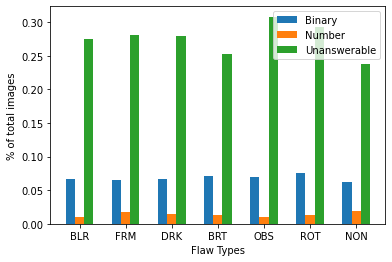

In [84]:
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(7)
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, binary_arr, width)
plt.bar(x, num_arr, width)
plt.bar(x+0.2, unanswer_arr, width)
plt.xticks(x, ALL_FLAW_TYPE)
plt.xlabel("Flaw Types")
plt.ylabel("% of total images")
plt.legend(["Binary", "Number", "Unanswerable"])
plt.show()